# Блок 1

# Описание датасета

Данные о поездках на такси в Нью-Йорке. \
Целевая переменная: trip_duration (длительность поездки). \
Задача: "Мы предсказываем длительность поездки на такси".\
Признаки: Пространственные и временные признаки

# Импорт

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_log_error
from scipy import stats

import math
import warnings

In [159]:
sns.set(style="whitegrid", context="notebook")

In [160]:
warnings.filterwarnings('ignore')

In [161]:
train = pd.read_csv('/kaggle/input/cu-project-data/train.csv')
test = pd.read_csv('/kaggle/input/cu-project-data/test.csv')

# EDA

In [162]:
print(f'Размер train: {train.shape}')
print(f'Размер test: {test.shape}')

Размер train: (1458644, 11)
Размер test: (625134, 9)


## Посмотрим, как выглядит наш датасет

In [163]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [164]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Основная инфорация

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [166]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Кол-во nan значений

In [167]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Кайф, nan нет

## Анализ таргета

In [168]:
target = 'trip_duration'

print(f'Максимум: {train[target].max()}')
print(f'Минимум: {train[target].min()}')
print(f'Среднее: {train[target].mean()}')
print(f'Среднее: {train[target].median()}')
print(f'Квантили: \n{train[target].quantile([0.25, 0.5, 0.75, 0.9, 0.99])}')

Максимум: 3526282
Минимум: 1
Среднее: 959.4922729603659
Среднее: 662.0
Квантили: 
0.25     397.0
0.50     662.0
0.75    1075.0
0.90    1634.0
0.99    3440.0
Name: trip_duration, dtype: float64


### Распределение таргета

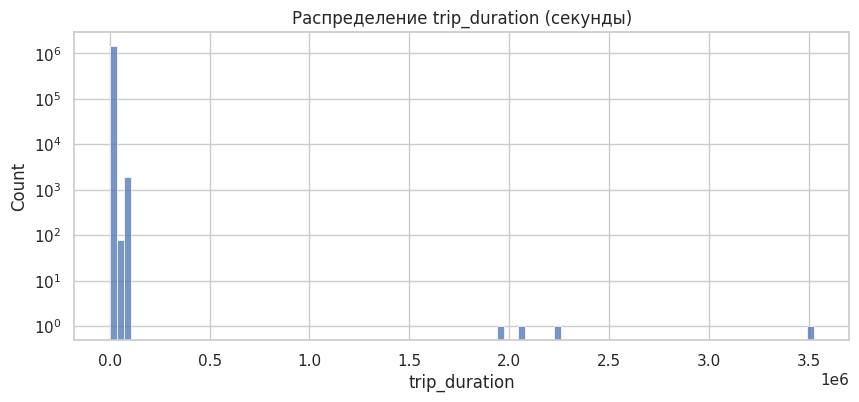

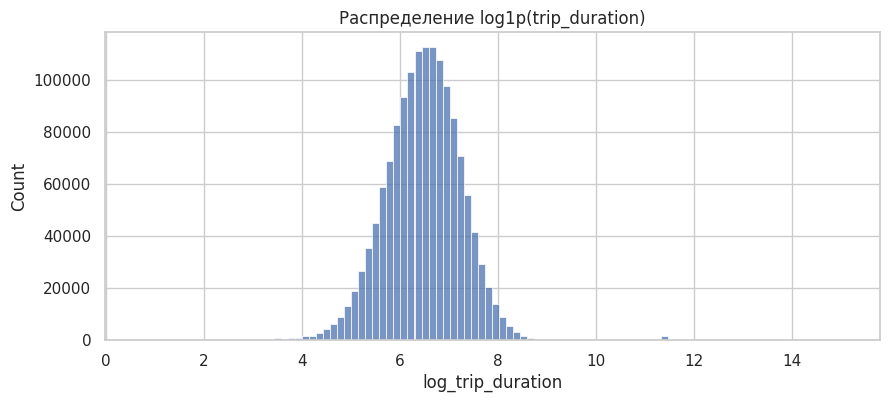

In [169]:
plt.figure(figsize=(10, 4))
sns.histplot(train[target], bins=100, kde=False)
plt.title("Распределение trip_duration (секунды)")
plt.xlabel("trip_duration")
plt.yscale("log")
plt.show()

train["log_trip_duration"] = np.log1p(train[target])

plt.figure(figsize=(10, 4))
sns.histplot(train["log_trip_duration"], bins=100, kde=False)
plt.title("Распределение log1p(trip_duration)")
plt.xlabel("log_trip_duration")
plt.show()

##  Временная фича

### Приведём к нормальному виду

In [170]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [171]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_day_of_week'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=train['pickup_datetime'].min(), 
                       end=train['pickup_datetime'].max())
holiday_dates = set(holidays.date)

train['is_weekend'] = (
    (train['pickup_datetime'].dt.dayofweek.isin([5, 6])) | 
    (train['pickup_datetime'].dt.date.isin(holiday_dates))
).astype(int)

In [172]:
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour
train['dropoff_minute'] = train['dropoff_datetime'].dt.minute

In [173]:
train = train.drop(columns=['pickup_datetime'], axis=1)
train = train.drop(columns=['dropoff_datetime'], axis=1)

In [174]:
train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,24,0,3,0,17,32
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,43,6,6,1,0,54
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,35,1,1,0,12,10
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,32,2,4,0,19,39
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,30,5,3,1,13,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,31,4,4,0,13,44
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,35,6,1,1,7,46
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,57,4,4,0,7,10
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,56,1,1,0,16,2


### Распределение поездок по часам

In [175]:
hour_duration = train.groupby('pickup_hour')[target].mean().reset_index().sort_values('pickup_hour')

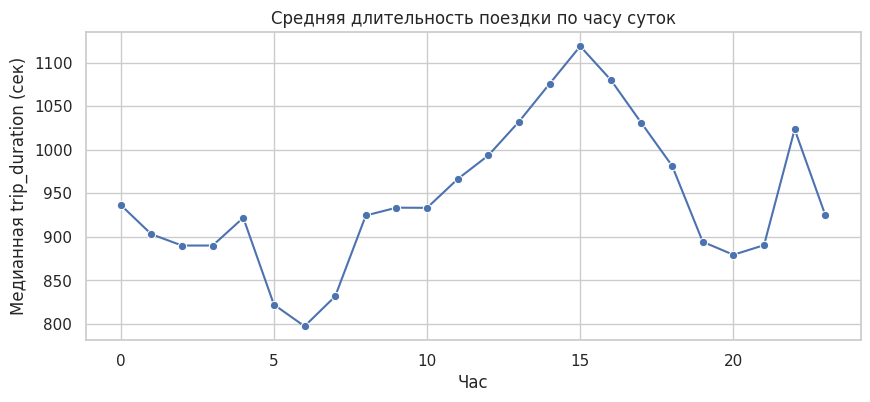

In [176]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_duration, x="pickup_hour", y=target, marker="o")
plt.title("Средняя длительность поездки по часу суток")
plt.xlabel("Час")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

### Распределение поездок по дням недели

In [177]:
day_of_week_duration = train.groupby('pickup_day_of_week')[target].mean().reset_index().sort_values('pickup_day_of_week')

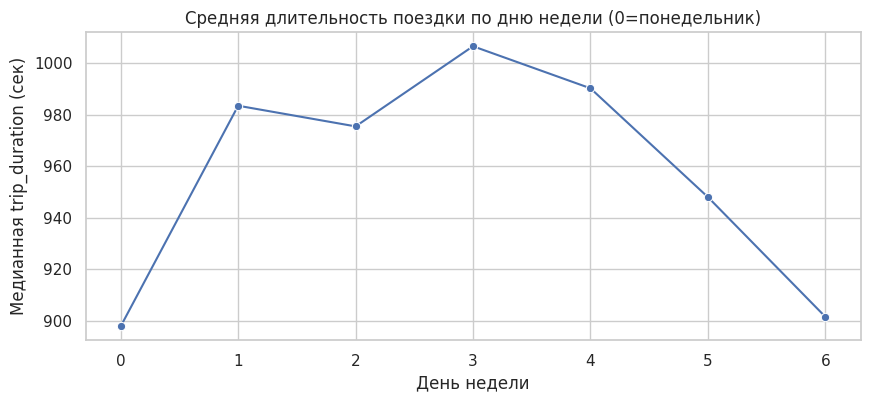

In [178]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=day_of_week_duration, x="pickup_day_of_week", y=target, marker="o")
plt.title("Средняя длительность поездки по дню недели (0=понедельник)")
plt.xlabel("День недели")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

## Георграфические признаки

### Приведём к нормальному виду

In [179]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [180]:
train['distance_km'] = haversine(train["pickup_longitude"], train["pickup_latitude"], train["dropoff_longitude"], train["dropoff_latitude"])

### Посмоторим на распредеение расстояний поездок

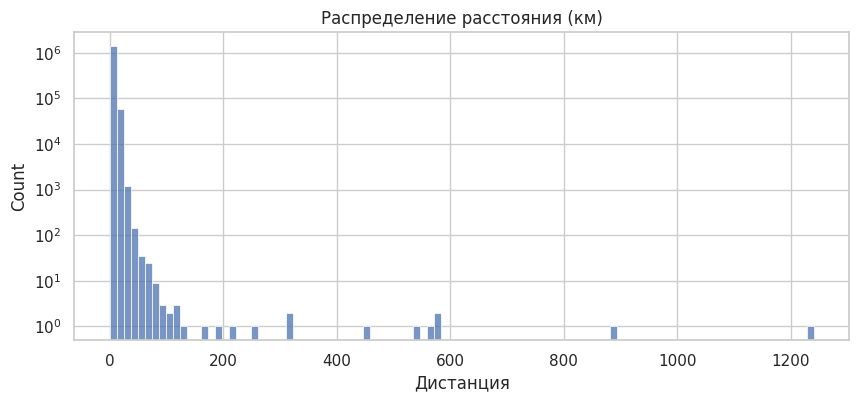

In [181]:
plt.figure(figsize=(10, 4))
sns.histplot(train["distance_km"], bins=100, kde=False)
plt.title("Распределение расстояния (км)")
plt.xlabel("Дистанция")
plt.yscale("log")
plt.show()

In [182]:
train["distance_km"].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: distance_km, dtype: float64

## Проче признаки

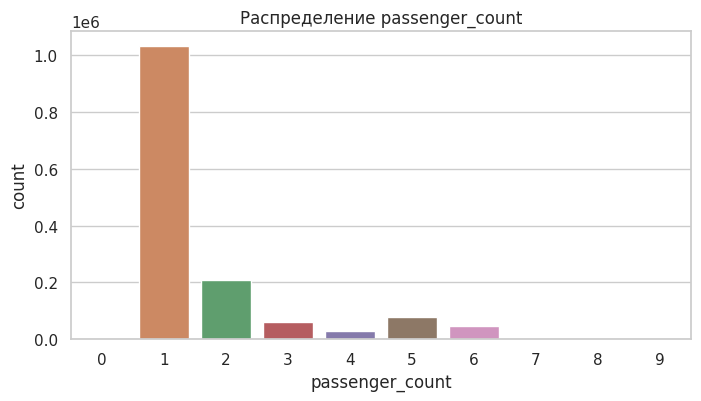

In [183]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="passenger_count")
plt.title("Распределение passenger_count")
plt.show()

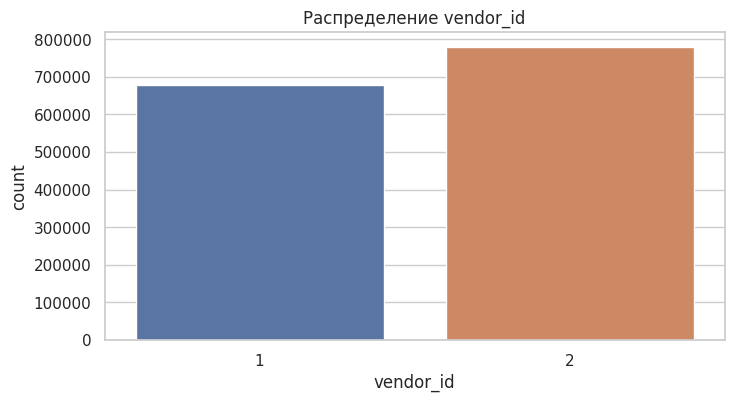

In [184]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="vendor_id")
plt.title("Распределение vendor_id")
plt.show()

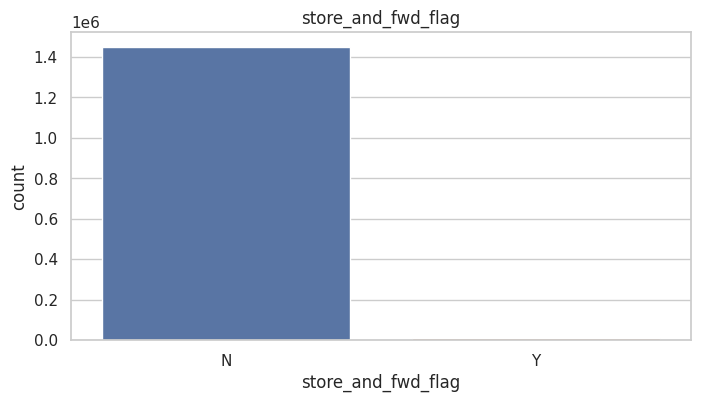

In [185]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="store_and_fwd_flag")
plt.title("store_and_fwd_flag")
plt.show()

In [186]:
train['store_and_fwd_flag'] = (train['store_and_fwd_flag'] == 'N').astype(int)


# Подготовка данных

## Очистка выбросов

In [187]:
clean_train = train.copy()

In [188]:
clean_train = clean_train[
    (clean_train[target] >= 1) & (clean_train[target] <= 86400)
]

In [189]:
clean_train = clean_train[
    (clean_train["distance_km"] > 0) & (clean_train["distance_km"] <= 200)
]

In [190]:
clean_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,1,455,6.122493,17,24,0,3,0,17,32,1.498521
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,1,663,6.498282,0,43,6,6,1,0,54,1.805507
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,1,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,1,429,6.063785,19,32,2,4,0,19,39,1.485498
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,1,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,1,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,1,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,1,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,1,373,5.924256,15,56,1,1,0,16,2,1.092564


In [191]:
clean_train["log_trip_duration"] = np.log1p(clean_train[target])

In [192]:
clean_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,1,455,6.122493,17,24,0,3,0,17,32,1.498521
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,1,663,6.498282,0,43,6,6,1,0,54,1.805507
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,1,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,1,429,6.063785,19,32,2,4,0,19,39,1.485498
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,1,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,1,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,1,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,1,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,1,373,5.924256,15,56,1,1,0,16,2,1.092564


In [193]:
clean_train = clean_train.drop(columns=['id'])

# Разделение данных

In [194]:
X, y = clean_train.drop(columns=['log_trip_duration', target, 'dropoff_hour', 'dropoff_minute'], axis=1), clean_train['log_trip_duration']

In [195]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [196]:
X_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,distance_km
98247,2,1,-73.991959,40.756989,-73.981987,40.762211,1,16,50,5,4,1,1.021066
1391585,2,2,-73.953293,40.771778,-73.992172,40.690151,1,23,12,6,2,1,9.649621
36924,1,1,-74.001572,40.730900,-74.006470,40.720448,1,19,37,5,2,1,1.233355
942484,2,1,-74.015137,40.709751,-73.994507,40.740978,1,22,47,6,5,1,3.883176
579173,2,5,-73.977303,40.754379,-73.976143,40.760681,1,7,19,4,6,0,0.707512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260232,1,1,-73.951546,40.773685,-73.951843,40.781689,1,17,33,4,1,0,0.890272
1420179,1,1,-74.004204,40.742310,-74.011734,40.713848,1,0,8,5,3,1,3.227755
132467,1,1,-73.979675,40.764988,-73.991119,40.774853,1,19,49,0,4,0,1.460138
673937,2,1,-73.971634,40.762917,-73.998924,40.761158,1,1,56,6,3,1,2.306754


# Бэйслайн модель

In [197]:
model = LinearRegression()

In [198]:
model.fit(X_train, y_train)

LinearRegression()

In [199]:
y_pred = model.predict(X_val)

# Бейслайн RMSLE: 0.08639560044800579

In [200]:
print(f'Бейслайн RMSLE: {np.sqrt(mean_squared_log_error(y_true=y_val, y_pred=y_pred))}')

Бейслайн RMSLE: 0.08639560044800579


# Блок 2

## Кодировка Traget Encoding

In [201]:
import category_encoders as ce

In [202]:
clean_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1,455,6.122493,17,24,0,3,0,17,32,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1,663,6.498282,0,43,6,6,1,0,54,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,1,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1,429,6.063785,19,32,2,4,0,19,39,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,1,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,1,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,1,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,1,373,5.924256,15,56,1,1,0,16,2,1.092564


In [203]:
X = clean_train[['store_and_fwd_flag']]
y = clean_train['log_trip_duration']

In [204]:
encoder = ce.TargetEncoder(cols=['store_and_fwd_flag'])

In [205]:
X_encoded = encoder.fit_transform(X, y)

In [206]:
clean_train_encoded = clean_train.copy()

In [207]:
clean_train_encoded['store_and_fwd_flag'] = X_encoded['store_and_fwd_flag']

In [208]:
clean_train_encoded

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6.471089,455,6.122493,17,24,0,3,0,17,32,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6.471089,663,6.498282,0,43,6,6,1,0,54,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.471089,2124,7.661527,11,35,1,1,0,12,10,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,6.471089,429,6.063785,19,32,2,4,0,19,39,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,6.471089,435,6.077642,13,30,5,3,1,13,38,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,6.471089,778,6.658011,13,31,4,4,0,13,44,1.225080
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,6.471089,655,6.486161,7,35,6,1,1,7,46,6.049836
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,6.471089,764,6.639876,6,57,4,4,0,7,10,7.824606
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,6.471089,373,5.924256,15,56,1,1,0,16,2,1.092564


## Признаки, основанные на ближайших соседях

### Функция ищет сколько раз такси приезжало в разные зоны, зоны разбиваются по координатам с точностью до 3-х знаков после запятой(Другую идею где сложность не \$n^2$ я не придумал)

### Создаим фичу - которая будет отрадать уровень популярности места высадки, то есть куа чаще всего заказывают такси

In [209]:
def zone_popular(q1, q2, q3, count):
    if count >= q3:
        return 3
    elif count >= q2:
        return 2
    elif count >= q1:
        return 1
    else:
        return 0

In [210]:
def find_popular_zones(df, lat_col='latitude', lon_col='longitude', precision=3):
    result_df = df.copy()
    
    result_df['lat_zone'] = result_df[lat_col].round(precision)
    result_df['lon_zone'] = result_df[lon_col].round(precision)
    result_df['zone_id'] = result_df['lat_zone'].astype(str) + '_' + result_df['lon_zone'].astype(str)
    
    zone_stats = result_df.groupby('zone_id').size().reset_index(name='zone_visit_count')

    q1 = zone_stats['zone_visit_count'].quantile(0.75)
    q2 = zone_stats['zone_visit_count'].quantile(0.9)
    q3 = zone_stats['zone_visit_count'].quantile(0.95)

    print(f"Квантили: q75={q1}, q90={q2}, q95={q3}")

    zone_stats['popular_lavel'] = zone_stats['zone_visit_count'].apply(lambda x: zone_popular(q1=q1, q2=q2, q3=q3, count=x))

    result_df = result_df.merge(zone_stats[['zone_id', 'zone_visit_count', 'popular_lavel']], on='zone_id', how='left')

    
    result_df = result_df.drop(['lat_zone', 'lon_zone', 'zone_id', 'zone_visit_count'], axis=1)
    
    return result_df

In [211]:
result_df = find_popular_zones(df=clean_train_encoded, lat_col='dropoff_latitude', lon_col='dropoff_longitude')

Квантили: q75=10.0, q90=84.0, q95=305.0


In [212]:
result_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km,popular_lavel
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6.471089,455,6.122493,17,24,0,3,0,17,32,1.498521,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6.471089,663,6.498282,0,43,6,6,1,0,54,1.805507,2
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.471089,2124,7.661527,11,35,1,1,0,12,10,6.385098,2
3,2,1,-74.010040,40.719971,-74.012268,40.706718,6.471089,429,6.063785,19,32,2,4,0,19,39,1.485498,3
4,2,1,-73.973053,40.793209,-73.972923,40.782520,6.471089,435,6.077642,13,30,5,3,1,13,38,1.188588,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452727,2,4,-73.982201,40.745522,-73.994911,40.740170,6.471089,778,6.658011,13,31,4,4,0,13,44,1.225080,3
1452728,1,1,-74.000946,40.747379,-73.970184,40.796547,6.471089,655,6.486161,7,35,6,1,1,7,46,6.049836,3
1452729,2,1,-73.959129,40.768799,-74.004433,40.707371,6.471089,764,6.639876,6,57,4,4,0,7,10,7.824606,3
1452730,1,1,-73.982079,40.749062,-73.974632,40.757107,6.471089,373,5.924256,15,56,1,1,0,16,2,1.092564,3


### Вторая фича - это trip_duration была сдела на прошлой неделе в блоке EDA

## Обработка временных признаков

### уже есть в блоке временная фича, там добавили проверку есть ли в списке праздников США, через библиотеку pandas.tseries.holiday

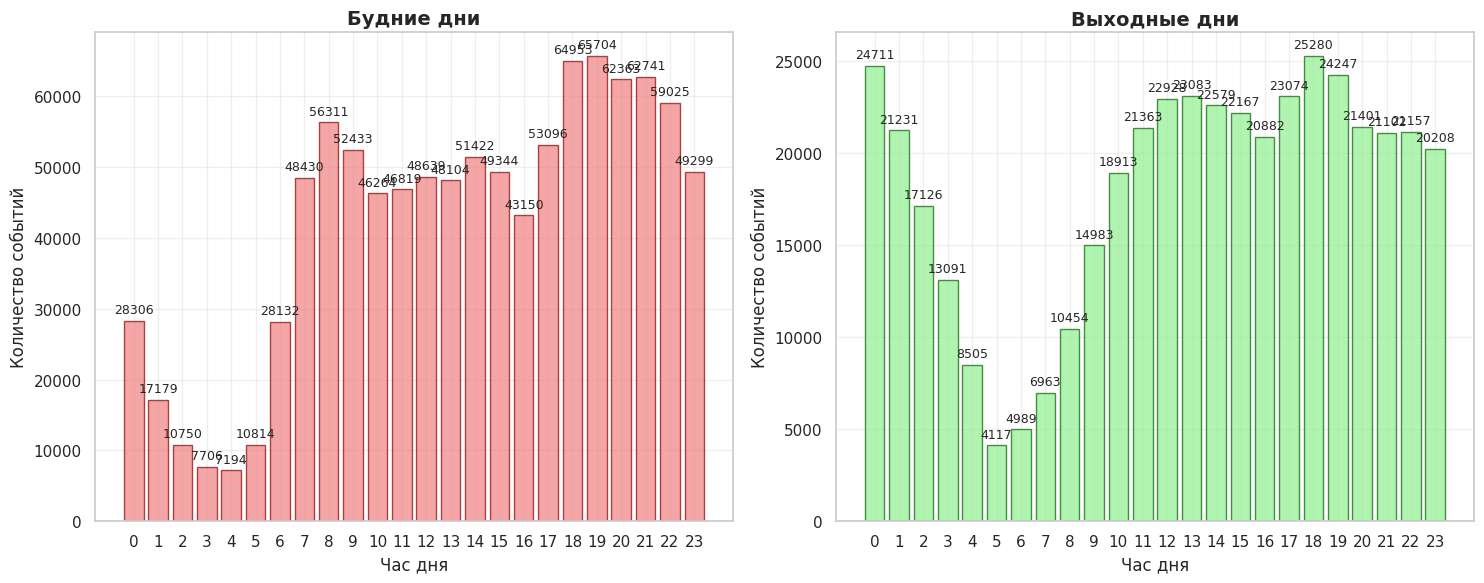

In [213]:
plt.figure(figsize=(15, 6))

weekend_hours = result_df[result_df['is_weekend'] == 1]['pickup_hour'].value_counts().sort_index()
weekday_hours = result_df[result_df['is_weekend'] == 0]['pickup_hour'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(weekday_hours.index, weekday_hours.values, color='lightcoral', alpha=0.7, edgecolor='darkred')
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.title('Будние дни', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

for i, count in enumerate(weekday_hours.values):
    plt.text(weekday_hours.index[i], count + max(weekday_hours.values)*0.01, 
             str(count), ha='center', va='bottom', fontsize=9)


plt.subplot(1, 2, 2)
plt.bar(weekend_hours.index, weekend_hours.values, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.title('Выходные дни', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

for i, count in enumerate(weekend_hours.values):
    plt.text(weekend_hours.index[i], count + max(weekend_hours.values)*0.01, 
             str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [214]:
result_df['is_peak_hour'] = (
    (result_df['is_weekend'] == 1) & (result_df['pickup_hour'].isin([0, 16, 17, 18])) |
    (result_df['is_weekend'] == 0) & (result_df['pickup_hour'].isin([18, 19, 20, 21]))
).astype(int)

In [215]:
result_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km,popular_lavel,is_peak_hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6.471089,455,6.122493,17,24,0,3,0,17,32,1.498521,3,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6.471089,663,6.498282,0,43,6,6,1,0,54,1.805507,2,1
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.471089,2124,7.661527,11,35,1,1,0,12,10,6.385098,2,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,6.471089,429,6.063785,19,32,2,4,0,19,39,1.485498,3,1
4,2,1,-73.973053,40.793209,-73.972923,40.782520,6.471089,435,6.077642,13,30,5,3,1,13,38,1.188588,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452727,2,4,-73.982201,40.745522,-73.994911,40.740170,6.471089,778,6.658011,13,31,4,4,0,13,44,1.225080,3,0
1452728,1,1,-74.000946,40.747379,-73.970184,40.796547,6.471089,655,6.486161,7,35,6,1,1,7,46,6.049836,3,0
1452729,2,1,-73.959129,40.768799,-74.004433,40.707371,6.471089,764,6.639876,6,57,4,4,0,7,10,7.824606,3,0
1452730,1,1,-73.982079,40.749062,-73.974632,40.757107,6.471089,373,5.924256,15,56,1,1,0,16,2,1.092564,3,0


## Создание контектных признаков

### Манхэттенское расстояние с коррекцией на географическую широту

In [216]:
lon_diff = result_df['dropoff_longitude'] - result_df['pickup_longitude']
lat_diff = result_df['dropoff_latitude'] - result_df['pickup_latitude']

In [217]:
avg_latitude_rad = np.radians((result_df['pickup_latitude'] + result_df['dropoff_latitude']) / 2)

In [218]:
result_df['manhattan_distance_km'] = (np.abs(lat_diff) * 111.0 + np.abs(lon_diff) * 111.0 * np.cos(avg_latitude_rad))

In [219]:
result_df['route_straightness_ratio'] = (result_df['manhattan_distance_km'] / result_df['distance_km'].clip(lower=0.1))

### Пассажиро-киломатры

In [220]:
result_df['passenger_km_sqrt'] = np.sqrt(result_df['passenger_count']) * result_df['distance_km']

In [221]:
result_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_hour,...,pickup_month,is_weekend,dropoff_hour,dropoff_minute,distance_km,popular_lavel,is_peak_hour,manhattan_distance_km,route_straightness_ratio,passenger_km_sqrt
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6.471089,455,6.122493,17,...,3,0,17,32,1.498521,3,0,1.732417,1.156085,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6.471089,663,6.498282,0,...,6,1,0,54,1.805507,2,1,2.426335,1.343852,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.471089,2124,7.661527,11,...,1,0,12,10,6.385098,2,0,8.190090,1.282688,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,6.471089,429,6.063785,19,...,4,0,19,39,1.485498,3,1,1.658438,1.116418,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,6.471089,435,6.077642,13,...,3,1,13,38,1.188588,2,0,1.197355,1.007376,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452727,2,4,-73.982201,40.745522,-73.994911,40.740170,6.471089,778,6.658011,13,...,4,0,13,44,1.225080,3,0,1.663018,1.357477,2.450160
1452728,1,1,-74.000946,40.747379,-73.970184,40.796547,6.471089,655,6.486161,7,...,1,1,7,46,6.049836,3,0,8.043497,1.329540,6.049836
1452729,2,1,-73.959129,40.768799,-74.004433,40.707371,6.471089,764,6.639876,6,...,4,0,7,10,7.824606,3,0,10.628744,1.358374,7.824606
1452730,1,1,-73.982079,40.749062,-73.974632,40.757107,6.471089,373,5.924256,15,...,1,0,16,2,1.092564,3,0,1.519144,1.390440,1.092564


In [222]:
set(result_df.columns)

{'distance_km',
 'dropoff_hour',
 'dropoff_latitude',
 'dropoff_longitude',
 'dropoff_minute',
 'is_peak_hour',
 'is_weekend',
 'log_trip_duration',
 'manhattan_distance_km',
 'passenger_count',
 'passenger_km_sqrt',
 'pickup_day_of_week',
 'pickup_hour',
 'pickup_latitude',
 'pickup_longitude',
 'pickup_minute',
 'pickup_month',
 'popular_lavel',
 'route_straightness_ratio',
 'store_and_fwd_flag',
 'trip_duration',
 'vendor_id'}

## Отбор признаков

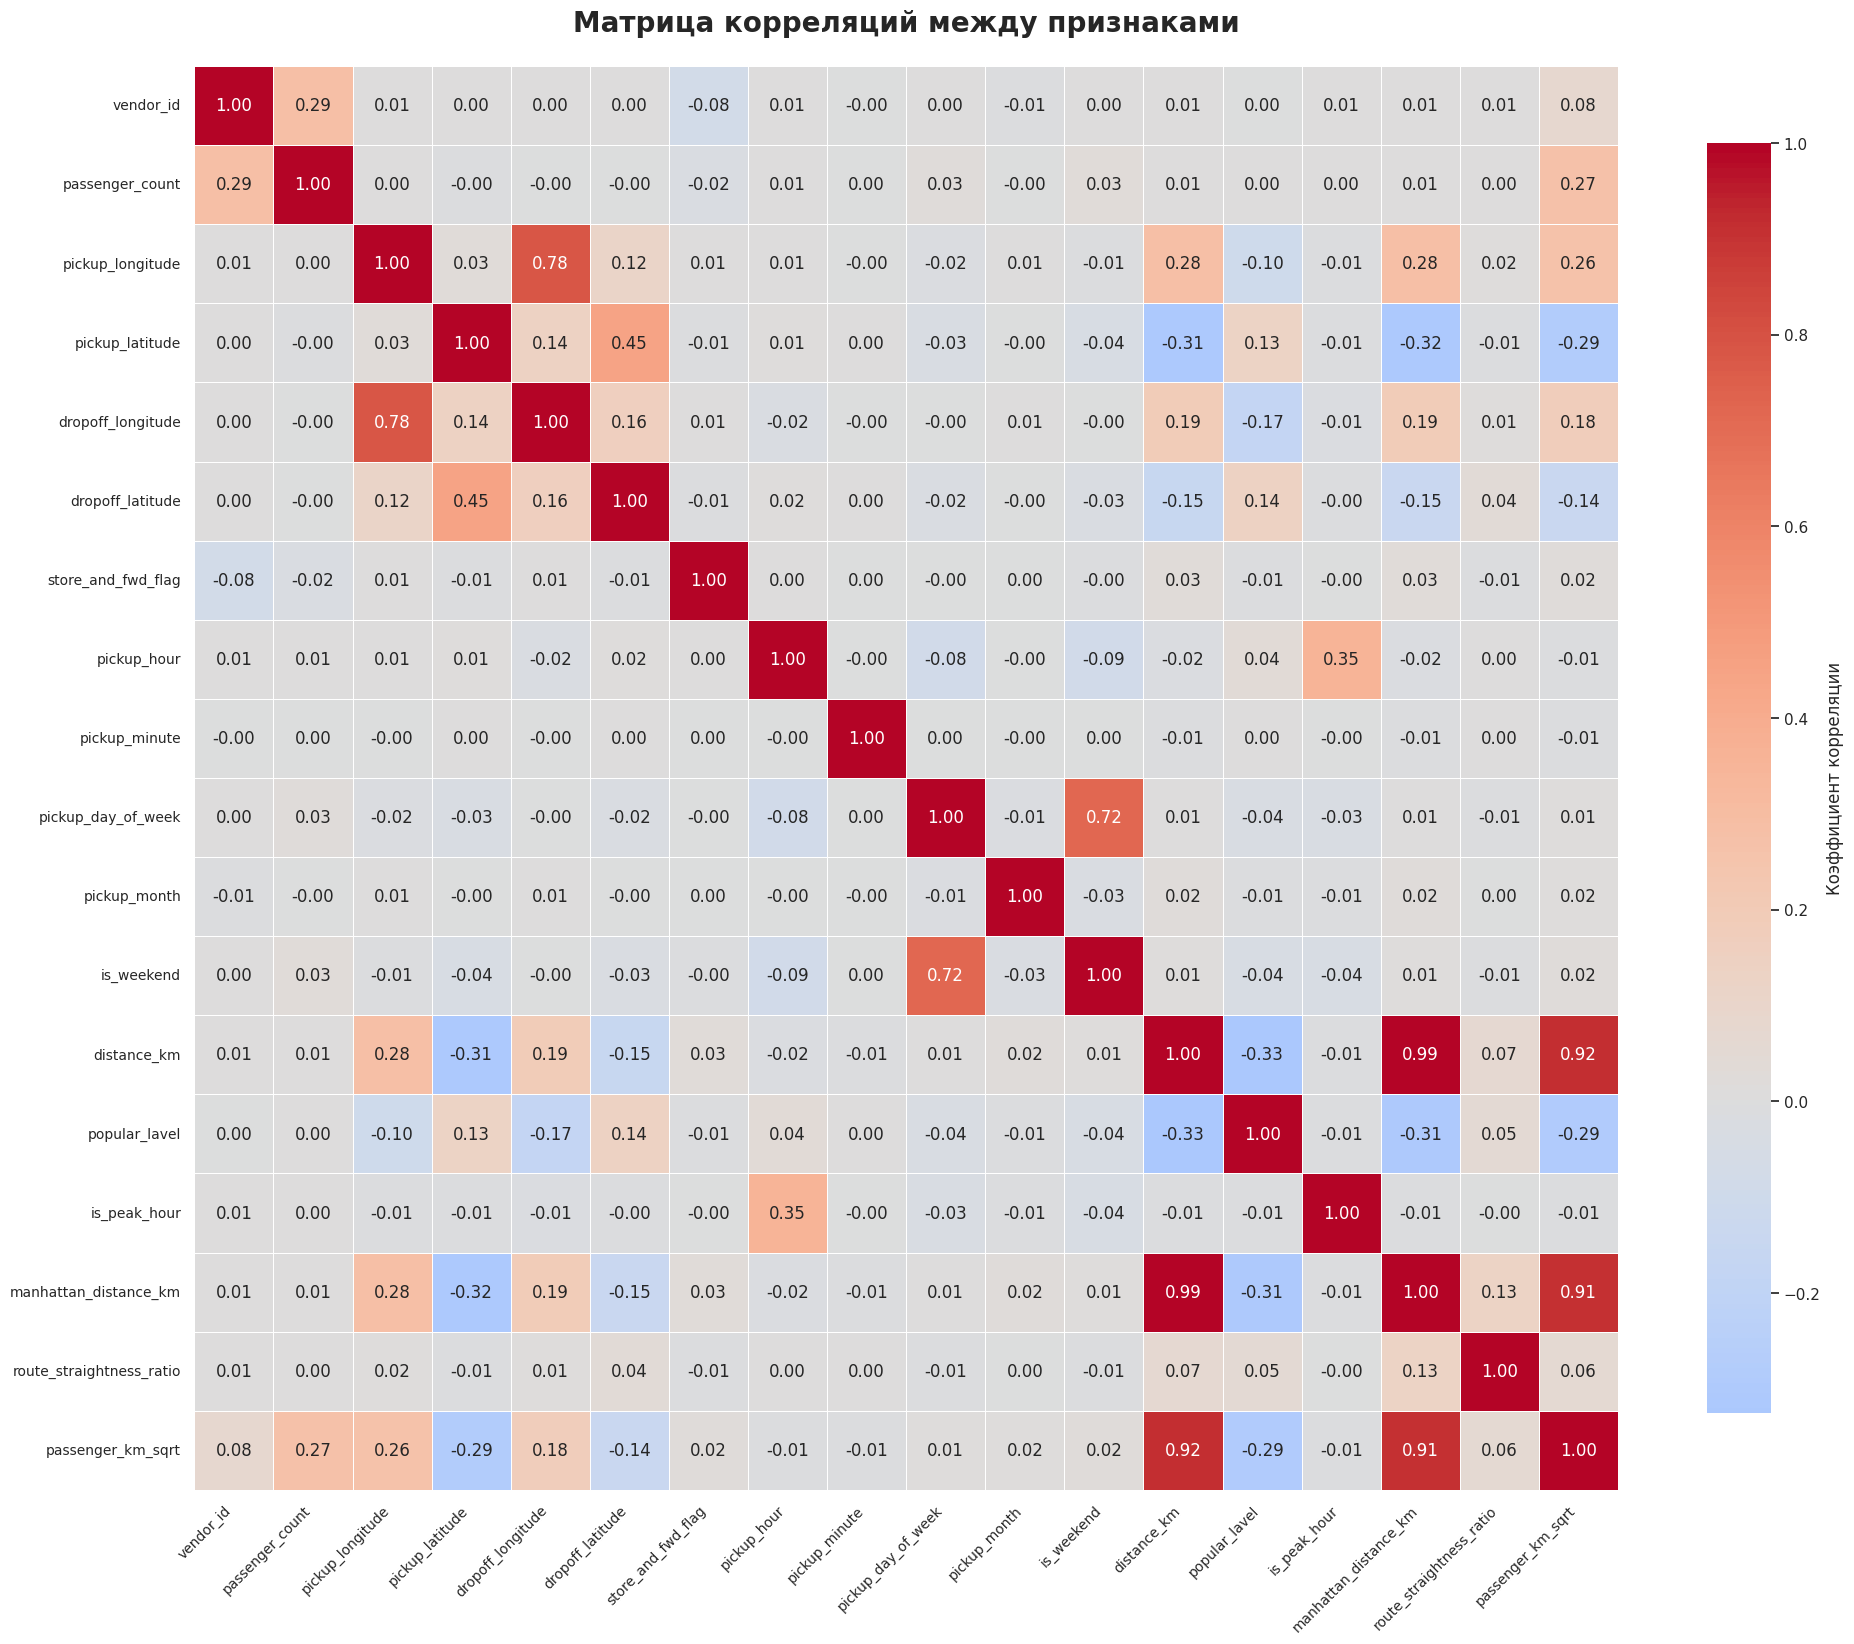

КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (log_trip_duration)

Топ-10 признаков по корреляции с log_trip_duration:
 1. distance_km              :   0.628
 2. manhattan_distance_km    :   0.613
 3. passenger_km_sqrt        :   0.575
 4. popular_lavel            :  -0.192
 5. pickup_latitude          :  -0.171
 6. dropoff_latitude         :  -0.140
 7. pickup_longitude         :   0.120
 8. dropoff_longitude        :   0.080
 9. route_straightness_ratio :   0.079
10. is_weekend               :  -0.060


In [223]:
target_cols = ['trip_duration', 'log_trip_duration', 'dropoff_minute', 'dropoff_hour']


numerical_cols = result_df.select_dtypes(include=[np.number]).columns.tolist()


features_for_corr = [col for col in numerical_cols if col not in target_cols]

plt.figure(figsize=(20, 18))

corr_matrix = result_df[features_for_corr].corr()

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75, "label": "Коэффициент корреляции"})

plt.title('Матрица корреляций между признаками', fontsize=20, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



print("КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (log_trip_duration)")


if 'log_trip_duration' in result_df.columns:
    correlations_with_target = {}
    for feature in features_for_corr:
        if feature in result_df.columns and 'log_trip_duration' in result_df.columns:
            corr = result_df[feature].corr(result_df['log_trip_duration'])
            correlations_with_target[feature] = corr
    
    sorted_correlations = sorted(correlations_with_target.items(), 
                                key=lambda x: abs(x[1]), 
                                reverse=True)
    
    print("\nТоп-10 признаков по корреляции с log_trip_duration:")
    for i, (feature, corr) in enumerate(sorted_correlations[:10], 1):
        print(f"{i:2d}. {feature:25}: {corr:7.3f}")

In [224]:
features_to_drop = [
    'manhattan_distance_km',      # 99% корреляция с distance_km
    'passenger_km_sqrt',          # 92% корреляция с distance_km
    'vendor_id',                  # Низкая информативность
]

In [225]:
result_df_clean = result_df.drop(columns=features_to_drop)

# Обработка аномалий

## Статистические методы

In [226]:
sns.set(style="whitegrid", context="notebook")

num_cols = ["log_trip_duration", "distance_km", "passenger_count"]

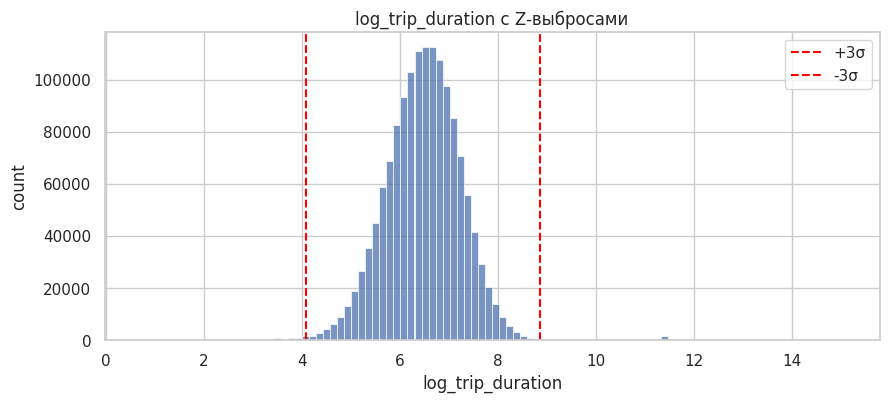

In [227]:
z_scores = np.abs(stats.zscore(train[num_cols]))
z_thresh = 3.0

for i, col in enumerate(num_cols):
    train[f"is_z_outlier_{col}"] = (z_scores[:, i] > z_thresh).astype(int)

train[[c for c in train.columns if c.startswith("is_z_outlier_")]].mean()

plt.figure(figsize=(10, 4))
sns.histplot(train["log_trip_duration"], bins=100, kde=False)
plt.title("log_trip_duration с Z-выбросами")
plt.xlabel("log_trip_duration")
plt.ylabel("count")

mu = train["log_trip_duration"].mean()
sigma = train["log_trip_duration"].std()
plt.axvline(mu + z_thresh * sigma, color="red", linestyle="--", label="+3σ")
plt.axvline(mu - z_thresh * sigma, color="red", linestyle="--", label="-3σ")
plt.legend()
plt.show()


log_trip_duration: IQR=[5.986, 6.981], low=4.495, high=8.473, доля выбросов=0.0133
distance_km: IQR=[1.232, 3.875], low=-2.733, high=7.841, доля выбросов=0.0964


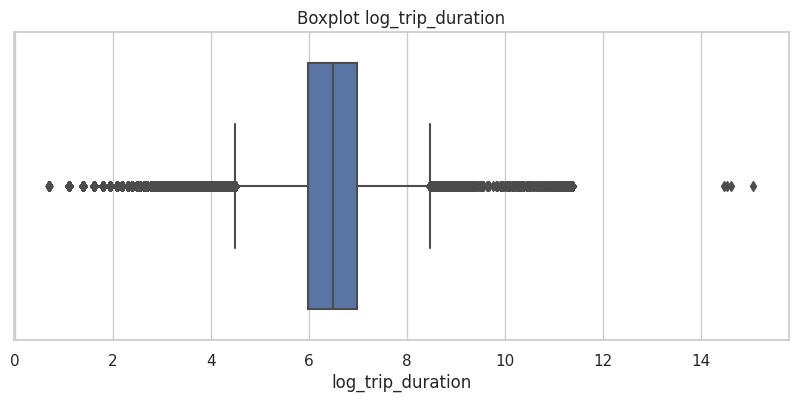

In [228]:
for col in ["log_trip_duration", "distance_km"]:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    train[f"is_iqr_outlier_{col}"] = (
        (train[col] < lower) | (train[col] > upper)
    ).astype(int)

    print(
        f"{col}: IQR=[{q1:.3f}, {q3:.3f}], "
        f"low={lower:.3f}, high={upper:.3f}, "
        f"доля выбросов={train[f'is_iqr_outlier_{col}'].mean():.4f}"
    )

plt.figure(figsize=(10, 4))
sns.boxplot(x=train["log_trip_duration"])
plt.title("Boxplot log_trip_duration")
plt.show()


In [229]:
from scipy.stats import t as student_t

def grubbs_outlier_mask(series, alpha=0.05):
    s = series.dropna().values
    n = s.size
    if n < 3:
        return pd.Series(False, index=series.index)

    mean = s.mean()
    std = s.std(ddof=1)
    abs_diff = np.abs(s - mean)
    idx_max = abs_diff.argmax()
    G = abs_diff[idx_max] / std

    t_crit = student_t.isf(alpha / (2 * n), n - 2)
    G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

    mask_compact = np.zeros_like(s, dtype=bool)
    if G > G_crit:
        mask_compact[idx_max] = True

    mask_full = pd.Series(False, index=series.index)
    mask_full[series.dropna().index] = mask_compact
    return mask_full

sample = train["log_trip_duration"].sample(5000, random_state=42)
grubbs_mask_sample = grubbs_outlier_mask(sample, alpha=0.01)

train["is_grubbs_outlier_log_trip"] = False
train.loc[grubbs_mask_sample[grubbs_mask_sample].index, "is_grubbs_outlier_log_trip"] = True

train["is_grubbs_outlier_log_trip"].mean()

anomaly_flags_cols = [
    "is_z_outlier_log_trip_duration",
    "is_z_outlier_distance_km",
    "is_iqr_outlier_log_trip_duration",
    "is_iqr_outlier_distance_km",
    "is_grubbs_outlier_log_trip",
]

train["anomaly_methods_count"] = train[anomaly_flags_cols].sum(axis=1)

train["is_any_stat_outlier"] = (train["anomaly_methods_count"] > 0).astype(int)

train[anomaly_flags_cols + ["anomaly_methods_count", "is_any_stat_outlier"]].head()


,is_z_outlier_log_trip_duration,is_z_outlier_distance_km,is_iqr_outlier_log_trip_duration,is_iqr_outlier_distance_km,is_grubbs_outlier_log_trip,anomaly_methods_count,is_any_stat_outlier
0,0,0,0,0,False,0,0
1,0,0,0,0,False,0,0
2,0,0,0,0,False,0,0
3,0,0,0,0,False,0,0
4,0,0,0,0,False,0,0


## Признаки на основе аномалий

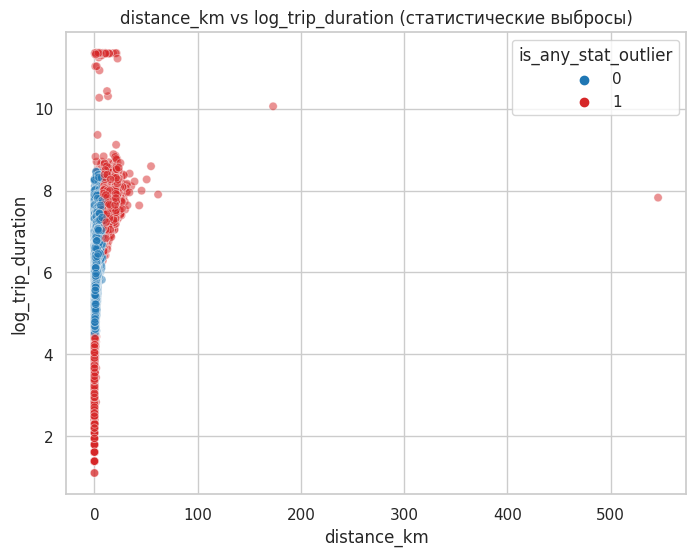

In [230]:
anomaly_flags_cols = [
    "is_z_outlier_log_trip_duration",
    "is_z_outlier_distance_km",
    "is_iqr_outlier_log_trip_duration",
    "is_iqr_outlier_distance_km",
    "is_grubbs_outlier_log_trip",
]

train["anomaly_methods_count"] = train[anomaly_flags_cols].sum(axis=1)

train["is_any_stat_outlier"] = (train["anomaly_methods_count"] > 0).astype(int)

train[anomaly_flags_cols + ["anomaly_methods_count", "is_any_stat_outlier"]].head()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train.sample(50000, random_state=42),
    x="distance_km",
    y="log_trip_duration",
    hue="is_any_stat_outlier",
    palette={0: "tab:blue", 1: "tab:red"},
    alpha=0.5,
)
plt.title("distance_km vs log_trip_duration (статистические выбросы)")
plt.show()


## ML методы

Isolation Forest vs IQR (log_trip_duration):
Precision: 0.094
Recall:    0.140
F1:        0.112
ROC-AUC:   0.917


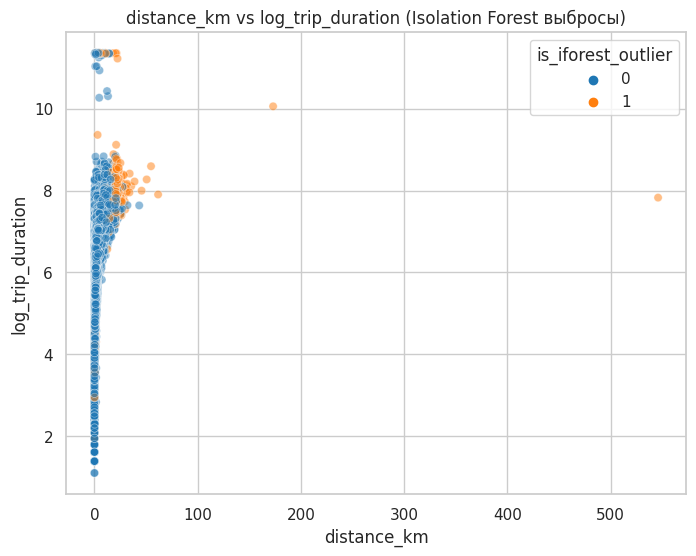

In [231]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

features_if = [
    "log_trip_duration",
    "distance_km",
    "passenger_count",
    "pickup_day_of_week",
    "pickup_month",
]

X_if = train[features_if].values

y_anom_base = train["is_iqr_outlier_log_trip_duration"].values


clf_if = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42,
    n_jobs=-1,
)
clf_if.fit(X_if)

if_labels = clf_if.predict(X_if)
if_scores = -clf_if.decision_function(X_if)

train["is_iforest_outlier"] = (if_labels == -1).astype(int)
train["iforest_score"] = if_scores

precision = precision_score(y_anom_base, train["is_iforest_outlier"])
recall = recall_score(y_anom_base, train["is_iforest_outlier"])
f1 = f1_score(y_anom_base, train["is_iforest_outlier"])
roc = roc_auc_score(y_anom_base, train["iforest_score"])

print(f"Isolation Forest vs IQR (log_trip_duration):")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1:        {f1:.3f}")
print(f"ROC-AUC:   {roc:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train.sample(50000, random_state=42),
    x="distance_km",
    y="log_trip_duration",
    hue="is_iforest_outlier",
    palette={0: "tab:blue", 1: "tab:orange"},
    alpha=0.5,
)
plt.title("distance_km vs log_trip_duration (Isolation Forest выбросы)")
plt.show()


## Повторное обучение модели

In [232]:
X_clean, y_clean = result_df_clean.drop(columns=['log_trip_duration', target, 'dropoff_hour', 'dropoff_minute'], axis=1), clean_train['log_trip_duration']

In [233]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, random_state=42)

In [234]:
X_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_minute,pickup_day_of_week,pickup_month,is_weekend,distance_km,popular_lavel,is_peak_hour,route_straightness_ratio
97849,1,-73.991959,40.756989,-73.981987,40.762211,6.471089,16,50,5,4,1,1.021066,3,1,1.388811
1385938,2,-73.953293,40.771778,-73.992172,40.690151,6.471089,23,12,6,2,1,9.649621,2,0,1.277861
36786,1,-74.001572,40.730900,-74.006470,40.720448,6.471089,19,37,5,2,1,1.233355,2,0,1.274759
938618,1,-74.015137,40.709751,-73.994507,40.740978,6.471089,22,47,6,5,1,3.883176,3,0,1.339525
576778,5,-73.977303,40.754379,-73.976143,40.760681,6.471089,7,19,4,6,0,0.707512,3,0,1.126502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,-73.951546,40.773685,-73.951843,40.781689,6.471089,17,33,4,1,0,0.890272,3,0,1.025944
1414414,1,-74.004204,40.742310,-74.011734,40.713848,6.471089,0,8,5,3,1,3.227755,3,1,1.175010
131932,1,-73.979675,40.764988,-73.991119,40.774853,6.471089,19,49,0,4,0,1.460138,3,1,1.408795
671155,1,-73.971634,40.762917,-73.998924,40.761158,6.471089,1,56,6,3,1,2.306754,3,0,1.079276


In [235]:
model = Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [236]:
model.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [237]:
y_pred = model.predict(X_val)

In [238]:
print(f'новый RMSLE: {np.sqrt(mean_squared_log_error(y_true=y_val, y_pred=y_pred))}')

новый RMSLE: 0.08604133279924289


In [239]:
old_rmsle = 0.08639560044800579
new_rmsle = 0.08604133279924289

In [242]:
improve = ((old_rmsle - new_rmsle) / old_rmsle) * 100
print(f'Модель улучшилась: RMSLE снизился с {old_rmsle:.6f} до {new_rmsle:.6f}')
print(f'Это уменьшение ошибки на ~ {improve:.4f}%')

Модель улучшилась: RMSLE снизился с 0.086396 до 0.086041
Это уменьшение ошибки на ~ 0.4101%
